# Training and Running of new GLM model
This Notebook is for training and running the our new GLM model that includes (for now only) deletion tokens

## Adding necessary imports
You can run this block to import necessary classes and functions

In [2]:
from fundemental_classes.model_related.glm_model import GLMModel

# You can change force_retrain to True if you want to always retrain your model everytime
model = GLMModel("./dna_bert_final", "simulated_sequences/augumented_sequence_size10000_length150_deletions0.2_nodeletionseq0.1.fasta", force_retrain=False)

Checking for existing trained model in ./dna_bert_final
Loading tokenizer...
Tokenizer loaded
Loading dataset...
Dataset loaded
Loading model...
Model loaded successfully!
Trained for 500 epochs
Final validation loss: 2.0200


## Training
We use `Bert` model to create the embeddings and train it using masking to get nicely trained model. If you want to change the size of training data, please look into `simulated_sequences` directory. \\\
*important:* Training is not necessary if you already have a trained model. You can load it using the `GLMModel`.

Detected kernel version 4.18.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Dataset split: 8000 training, 2000 validation
Starting Training


***** Running training *****
  Num examples = 8,000
  Num Epochs = 500
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 125,000
  Number of trainable parameters = 8,620,042


Step,Training Loss,Validation Loss
500,1.493300,1.490048
1000,1.489700,1.493731
1500,1.483800,1.488584
2000,1.483100,1.486528
2500,1.479600,1.480805
3000,1.480300,1.488474
3500,1.479800,1.486510
4000,1.482100,1.484163
4500,1.483100,1.487082
5000,1.480700,1.487284



***** Running Evaluation *****
  Num examples = 2000
  Batch size = 32
Saving model checkpoint to ./dna_bert_final/checkpoint-500
Configuration saved in ./dna_bert_final/checkpoint-500/config.json
Model weights saved in ./dna_bert_final/checkpoint-500/model.safetensors
Saving Trainer.data_collator.tokenizer by default as Trainer.processing_class is `None`
tokenizer config file saved in ./dna_bert_final/checkpoint-500/tokenizer_config.json
Special tokens file saved in ./dna_bert_final/checkpoint-500/special_tokens_map.json

***** Running Evaluation *****
  Num examples = 2000
  Batch size = 32
Saving model checkpoint to ./dna_bert_final/checkpoint-1000
Configuration saved in ./dna_bert_final/checkpoint-1000/config.json
Model weights saved in ./dna_bert_final/checkpoint-1000/model.safetensors
Saving Trainer.data_collator.tokenizer by default as Trainer.processing_class is `None`
tokenizer config file saved in ./dna_bert_final/checkpoint-1000/tokenizer_config.json
Special tokens file sav

Saving model and tokenizer...
Training complete
Metadata saved to ./dna_bert_final/training_metadata.json
Training curves saved to ./dna_bert_final/training_curves.png


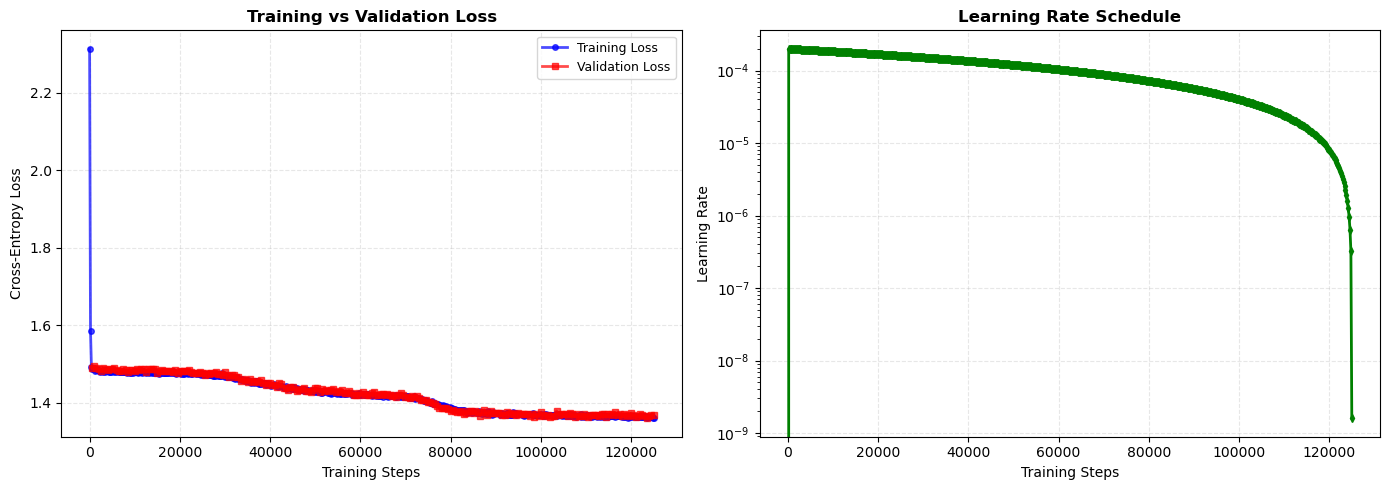


Training Summary:
Final training loss: 1.3618
Final validation loss: 1.3681
Best validation loss: 1.3605


In [3]:
model.train(epochs=500, batch_size=32, lr=2e-4)

## Visualization
This block is used for getting already trained model, passing the sequence to test how well the model performs.
\\\\\
*Important:* For now we pass our test cases by hand. However in the future we will generate good inputs to test how well the model functions

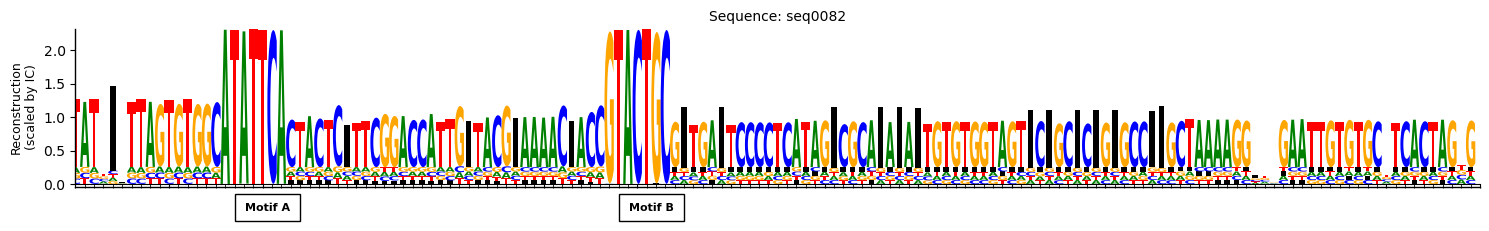

In [4]:
from fundemental_classes.visualization.sequence_plotter import plot


header = "seq0082|label=both|posAmotif=17|posBmotif=58|gaplength=30|deletions=24"
sequence = "GTAT---TTAGTGTGGCATATTCACTACTC-TTCGGACCATTG-TACG-AAAAC-ACCGTACTGCG-TGA-TCCCCTCATAG-CGCA-A-A-TGTGTGGTAGT-C-GC-C-G-GCC--GCTAAAAGG---GAATTGTGTGC-TCACTAGG"

prob_matrix = model.get_full_reconstruction_probs(sequence)

plot(header, sequence, prob_matrix, motif_length=7)